In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 6s 0us/step


In [3]:
len(X_train),len(X_test)

(60000, 10000)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

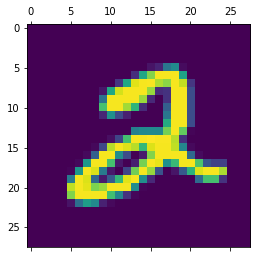

In [9]:
plt.matshow(X_train[5])

In [15]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [17]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 14s 8ms/step - loss: 0.2810 - accuracy: 0.9179 - val_loss: 0.1404 - val_accuracy: 0.9572
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1160 - accuracy: 0.9651 - val_loss: 0.1127 - val_accuracy: 0.9678
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0781 - accuracy: 0.9759 - val_loss: 0.1173 - val_accuracy: 0.9641
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0620 - accuracy: 0.9803 - val_loss: 0.1057 - val_accuracy: 0.9695
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0471 - accuracy: 0.9852 - val_loss: 0.1030 - val_accuracy: 0.9718
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0385 - accuracy: 0.9883 - val_loss: 0.1065 - val_accuracy: 0.9722
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0309 - accuracy: 0.9903 - val_loss: 0.1002 - val_ac

In [18]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [19]:
y_pred = y_prob.argmax(axis=1)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9749

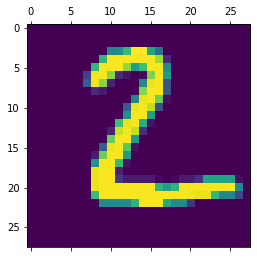

In [23]:
plt.matshow(X_test[1])

In [25]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 62ms/step


array([2], dtype=int64)

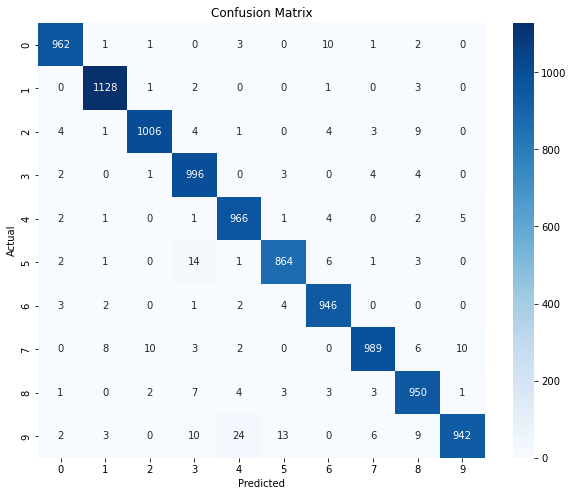

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred)
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [31]:
#now doing with scaling data
X_train = X_train / 255
X_test = X_test / 255

In [32]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [33]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 14s 8ms/step - loss: 1.0398 - accuracy: 0.6864 - val_loss: 0.5733 - val_accuracy: 0.8395
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5230 - accuracy: 0.8463 - val_loss: 0.4340 - val_accuracy: 0.8711
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4200 - accuracy: 0.8789 - val_loss: 0.3596 - val_accuracy: 0.8962
Epoch 4/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3590 - accuracy: 0.8970 - val_loss: 0.3161 - val_accuracy: 0.9102
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3245 - accuracy: 0.9066 - val_loss: 0.2949 - val_accuracy: 0.9173
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3003 - accuracy: 0.9132 - val_loss: 0.2788 - val_accuracy: 0.9213
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2800 - accuracy: 0.9189 - val_loss: 0.2569 - val_ac

In [34]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

313/313 [==============================] - 1s 3ms/step


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9325

In [36]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 57ms/step


array([2], dtype=int64)

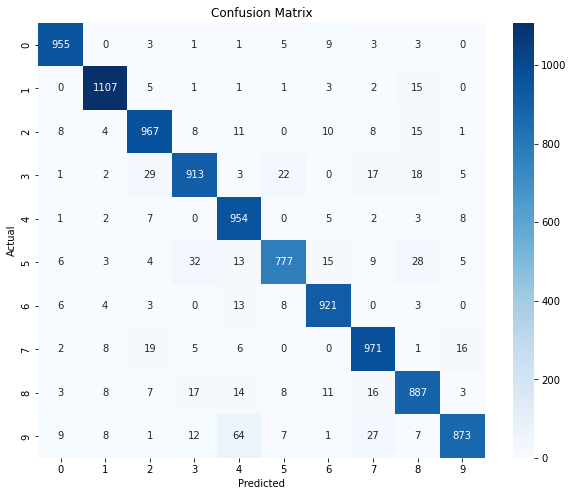

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred)
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()